# So sánh các thông số giao thông từ 2 file JSON

Notebook này sẽ:

- Đọc 2 file: "traffic_metrics.json" và "traffic_metrics copy.json" (cùng thư mục với notebook).
- Hiển thị bảng tổng hợp các thông số.
- Vẽ biểu đồ so sánh theo 2 nhóm: thời gian (giây) và số lượng/độ dài.

Lưu ý: Nếu thiếu thư viện vẽ, bạn có thể cài `matplotlib` bằng:

```
%pip install matplotlib
```

In [52]:
# Đọc 2 file JSON và chuẩn hóa dữ liệu
import json, os
from typing import Dict, List, Any

files = ["TUC4.json", "fixtime4.json"]
metric_keys: List[str] = [
    "average_wait_time",
    "total_vehicles_waited",
    "average_queue_length",
    "max_queue_length",
    "queue_measurements",
    "average_travel_time",
    "min_travel_time",
    "max_travel_time",
    "total_vehicles_traveled",
]

data: Dict[str, Dict[str, Any]] = {}
missing = []
for f in files:
    if not os.path.exists(f):
        missing.append(f)
        continue
    with open(f, "r", encoding="utf-8") as fh:
        payload = json.load(fh)
    label = os.path.splitext(os.path.basename(f))[0]
    if isinstance(payload, dict):
        row = {k: payload.get(k, None) for k in metric_keys}
    else:
        raise ValueError(f"Nội dung {f} không đúng định dạng JSON object.")
    data[label] = row

if missing:
    print("Thiếu file:", ", ".join(missing))
if len(data) < 2:
    print("Cảnh báo:", len(data), "file hợp lệ. Tiếp tục với những gì có.")

# Xem nhanh dữ liệu đã nạp
data

{'TUC4': {'average_wait_time': 114.59180687637162,
  'total_vehicles_waited': 1367,
  'average_queue_length': 35.214285714285715,
  'max_queue_length': 74.0,
  'queue_measurements': 140,
  'average_travel_time': 139.2501823486506,
  'min_travel_time': 10.0,
  'max_travel_time': 1083.0,
  'total_vehicles_traveled': 1371},
 'fixtime4': {'average_wait_time': 125.68265682656826,
  'total_vehicles_waited': 1355,
  'average_queue_length': 38.35,
  'max_queue_length': 79.0,
  'queue_measurements': 140,
  'average_travel_time': 148.57184536834427,
  'min_travel_time': 10.0,
  'max_travel_time': 1207.0,
  'total_vehicles_traveled': 1371}}

In [53]:
# Hiển thị bảng tổng hợp (pandas nếu có, fallback nếu không)
try:
    import pandas as pd
    from IPython.display import display
    df = pd.DataFrame.from_dict(data, orient='index')
    display(df)
except Exception as e:
    print("Không thể dùng pandas; hiển thị dạng dict (", e, "):")
    import pprint
    pprint.pprint(data)

,average_wait_time,total_vehicles_waited,average_queue_length,max_queue_length,queue_measurements,average_travel_time,min_travel_time,max_travel_time,total_vehicles_traveled
TUC4,114.591807,1367,35.214286,74.0,140,139.250182,10.0,1083.0,1371
fixtime4,125.682657,1355,38.350000,79.0,140,148.571845,10.0,1207.0,1371


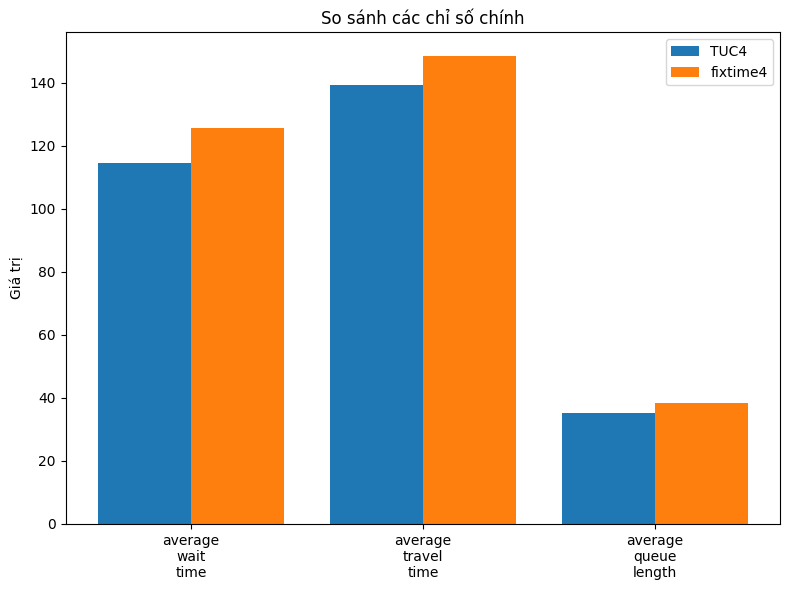

In [54]:
# Vẽ biểu đồ so sánh 3 chỉ số chính: average_wait_time, average_travel_time, average_queue_length
import numpy as np

try:
    import matplotlib.pyplot as plt
except Exception as e:
    raise ImportError("Cần cài matplotlib: dùng %pip install matplotlib") from e

main_metrics = [
    "average_wait_time",
    "average_travel_time",
    "average_queue_length",
]

labels = list(data.keys())

def collect(vals_keys):
    arr = []
    for lb in labels:
        row = data[lb]
        arr.append([row.get(k, np.nan) for k in vals_keys])
    return np.array(arr)

main_vals = collect(main_metrics)

fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(main_metrics))
width = 0.8 / max(1, len(labels))
for idx, lb in enumerate(labels):
    ax.bar(x + (idx - (len(labels)-1)/2)*width, main_vals[idx], width=width, label=lb)
ax.set_xticks(x)
ax.set_xticklabels([m.replace('_','\n') for m in main_metrics])
ax.set_title("So sánh các chỉ số chính")
ax.set_ylabel("Giá trị")
ax.legend()

plt.tight_layout()
plt.show()